# Python Assignment - Spring 2022
## Ceren Ordas

In [1]:
pip install biopython #this will install the "biopython" package

Note: you may need to restart the kernel to use updated packages.


In [2]:
import Bio #to import the biopython package
from Bio import Seq #import Seq package within biopython
from Bio import SeqIO #import SeqIO package within biopython
from Bio.Data import CodonTable #import CodonTable package within biopython
from Bio.SeqUtils import GC #import GC package within biopython
from Bio.SeqUtils.ProtParam import ProteinAnalysis #import ProteinAnalysis package within biopython
import pandas as pd #import the pandas package
import numpy as np #import the numpy package
import matplotlib.pyplot as plt #import the matplotlib.pyplot package

## Function 1: Document Dr. X's function with comments and with markdown text.

In [3]:
def get_sequences_from_file(fasta_fn): #to define a new function from our fasta file
    sequence_data_dict = {} #to create an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): #to identify sequences within our fasta file for every record
        description = record.description.split() #to create a new variable "description" and to split the entries
        species_name = description[1] + " " + description[2] #to create the species name from our file
        sequence_data_dict[species_name] = record.seq #to assign the right sequence to the right species name
    return(sequence_data_dict) ##to return the dictionary

## Function 2: Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.

In [4]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #to create a new table
print(mito_table) #to print the table

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

### Write a function that translates sequences
### Complete a function that translates using a loop over the string of nucleotide

In [5]:
def translate_function(string_nucleotides): #to define a function to translate the nucleotides to amino acids.
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # to import a codon table of the DNA.
    aa_seq_strings = "" #to create a new variable in order to put the amino acid sequences in
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i]+ string_nucleotides[i+1]+string_nucleotides[i+2] #to identify a codon as a set of 3 nucleotides. 
        if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG": #to identify a stop codon
            break #to stop the function before it reaches the stop codon
            #if we don't break the function, the amino acid sequence will contain more AA's than actually exist in the sequence
        else: #to continue/go on with the function 
            aa_seq_strings += mito_table.forward_table[codon] #to translate each codon into an amino acid
    return(aa_seq_strings) #to return the completed amino acid sequence

In [6]:
dna_to_aa_sequence_eg = "GACTATGTACAGATCGCTACT" #to create new variable with a short DNA sequence
translate_function(dna_to_aa_sequence_eg) #our function 2 example

'DYVQIAT'

## Function 3: Alternative function to write the translation of nucleotide sequences to amino acids.

In [7]:
def translate_alt_function(string_nucleotides): #to create alternative function to translate a nucleotide sequence to an amino acid
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #we are utilizing the "Vertebrate Mitochondrial" codon table from before to translate the nucleotide sequence to amino acids
    aa_seq_string = str(Seq.translate(string_nucleotides, mito_table)) [:-1] #with this, we make the AA sequence. Here the "[:-1]" will not the stop codon which is the last amino acid sequence on our data
    return(aa_seq_string) #this will return the new AA sequence

In [8]:
dna_to_aa_sequence_eg = "GACTATGTACAGATCGCTACT" # here we have the previous example
translate_alt_function(dna_to_aa_sequence_eg) #our function 3 example

'DYVQIA'

#### IT WORKS WOHOO!

## Function 4: Write a function that calculates the molecular weight of each amino acid sequence.

#### Use the ProtParam module.

In [9]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis #to import the ProteinAnalysis function from ProtParam in BioPython
def compute_molecular_weight(aa_seq): #to define the function that quantifies the molecular weight of the amino acid sequence
    aa_analysis = ProteinAnalysis(aa_seq) #to calculate the molecular weight of the sequence with the ProteinAnalysis function
    return (aa_analysis.molecular_weight()) #to return the molecular weight of the sequence

In [10]:
aa_sequence_eg = "PENGUINS" #our new example sequence.
compute_molecular_weight(aa_sequence_eg)

879.7737999999999

#### WOHOOOO!!

## MAIN!

In [11]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") #to pull the sequence from the fasta file and put them in a new list called cytb_seqs
penguins_df = pd.read_csv("penguins_mass.csv") #to make a data frame for body mass data of each penguin species
species_list = list(penguins_df.species) #to create a new list with each penguin species in the data set gotten from the column with the species list. 

## Function 5: Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [12]:
#On this website: "https://biopython.org/docs/1.75/api/Bio.SeqUtils.html", I was able to find a code to calculate the GC content and with trial and error I was able to make it work.
def calculate_gc_content(nucleotides): #to define the function in which the GC content in percentages is computed.
    return(gc_content) #to return the GC content

## Function 6: Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content. Set the value to 'NaN' to indicate that these cells are currently empty.

In [13]:
penguins_df['molecular_weight'] = 'NaN' #to add a new column, "molecular_weight"
penguins_df['GC_content'] = 'NaN' #to add a new column, "GC_content"
print(penguins_df) #to print our new data frame with two new columns "molecular_weight" and "GC_content" to our original data
#We set the value to 'NaN' to indicate that these cells are empty.

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00              NaN        NaN
1   Aptenodytes patagonicus  13.40              NaN        NaN
2       Eudyptes chrysocome   2.80              NaN        NaN
3     Eudyptes chrysolophus   4.50              NaN        NaN
4         Eudyptes sclateri   4.25              NaN        NaN
5           Eudyptula minor   1.60              NaN        NaN
6        Pygoscelis adeliae   4.60              NaN        NaN
7     Pygoscelis antarctica   4.10              NaN        NaN
8          Pygoscelis papua   6.10              NaN        NaN
9       Spheniscus demersus   3.20              NaN        NaN
10     Spheniscus humboldti   4.75              NaN        NaN
11  Spheniscus magellanicus   3.40              NaN        NaN


## Function 7: Write a for-loop that translates each sequence and gets molecular weight and computes the GC content

In [14]:
row = 0 #to set our variable row to the first row in the data
for key, value in cytb_seqs.items():
    aa_seq = translate_alt_function(value) #to create a variable aa_seq that becomes the amino acid sequence for each species using the alternative translate function (#3)
    computed_molecular_weight = compute_molecular_weight(aa_seq) #to compute the molecular weight of the amino acid sequences of each species
    penguins_df.loc[row, "molecular_weight"] = computed_molecular_weight #to add the molecular weight values into the "molecular_weight" column
    computed_gc_content = GC(value) #to compute the content of GC in percentage in the species' sequences
    penguins_df.loc[row, "GC_content"] = computed_gc_content #to add the GC content in percentage into the "GC_content" column
    row = row + 1 #to make the function keep going forward one row each time
print(penguins_df) #to print out the data frame now with the computed values

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00       42459.6021  48.381452
1   Aptenodytes patagonicus  13.40       42563.7067  49.693788
2       Eudyptes chrysocome   2.80       42475.5753  51.181102
3     Eudyptes chrysolophus   4.50       42445.5493  50.918635
4         Eudyptes sclateri   4.25       42475.5753  50.831146
5           Eudyptula minor   1.60       42491.6408  49.256343
6        Pygoscelis adeliae   4.60        42458.614  49.081365
7     Pygoscelis antarctica   4.10       42404.5423  47.769029
8          Pygoscelis papua   6.10       42595.8759  47.156605
9       Spheniscus demersus   3.20        42431.549  48.293963
10     Spheniscus humboldti   4.75        42399.552  49.256343
11  Spheniscus magellanicus   3.40       42459.6021  48.206474


## Function 8: Plot a bar-chart of the mass with the x-axes labeled with species names.

<AxesSubplot:title={'center':'Masses of Penguin Species'}, xlabel='species'>

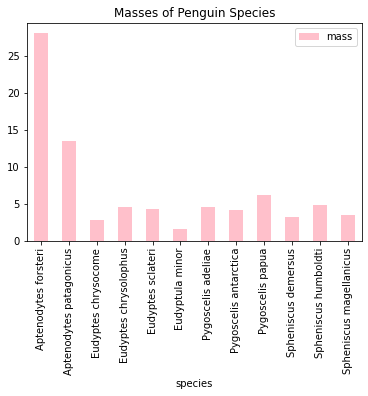

In [15]:
penguins_df.plot(kind='bar', x='species', y='mass', color='pink', title='Masses of Penguin Species')

### *Q1* What is the smallest penguin species?

#Blue penguin, (Eudyptula minor, which is also in our data set), also called little penguin, little blue penguin, or fairy penguin is the smallest of all known penguin species. (https://www.britannica.com/animal/blue-penguin)

### *Q2* What is the geographical range of this species?

#This species lives along the southern edge of mainland Australia, as well as Tasmania, New Zealand and the Chatham Islands. (https://www.birdsinbackyards.net/species/Eudyptula-minor)

## Function 9: Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

<AxesSubplot:title={'center':'Molecular Weight as a Function of GC-content of DNA Sequences of Penguin Species'}, xlabel='GC_content', ylabel='molecular_weight'>

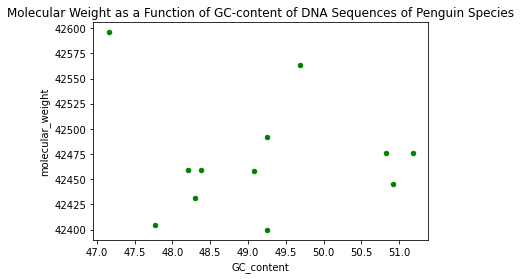

In [16]:
#I'm not really sure if I am plotting the right values so hopefully this is the correct approach.

penguins_df.plot(kind ='scatter', x = 'GC_content', y = 'molecular_weight', color='green', title ='Molecular Weight as a Function of GC-content of DNA Sequences of Penguin Species') #to make a scatter plot showing the molecular weight as a function of GC-content of the Penguin species

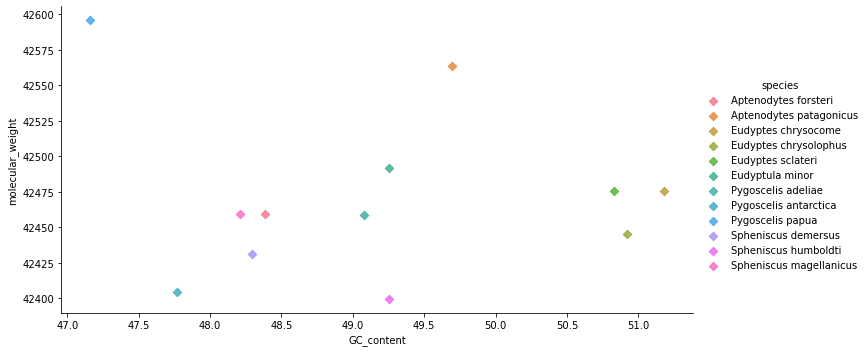

In [17]:
#Wanted to add legends for the species but could not figure out how to do it above so I tried a different approach down below.
import matplotlib.pyplot as plt #to import matplotlib.pyplot
import seaborn as sns #to import seaborn
get_ipython().run_line_magic('matplotlib', 'inline')
sns.lmplot(x="GC_content", y="molecular_weight", data=penguins_df, fit_reg=False, height=5, aspect=2, hue='species',markers='D') #to make a scatter plot and giving legends to the species on our data

## Function 10: Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [18]:
penguins_df.to_csv("penguins_mass_cytb.csv") #to create a new csv file and save the DataFrame it consists to a file called "penguins_mass_cytb.csv"

## Function 11: BONUS
#### What else can we do with this dataset in Python? 
#### Add functions or anything that might be interesting and fun. (optional)

## 11-Bonus: Plot a visualization of the molecular weight (y-axis) as a function of mass (x-axis).

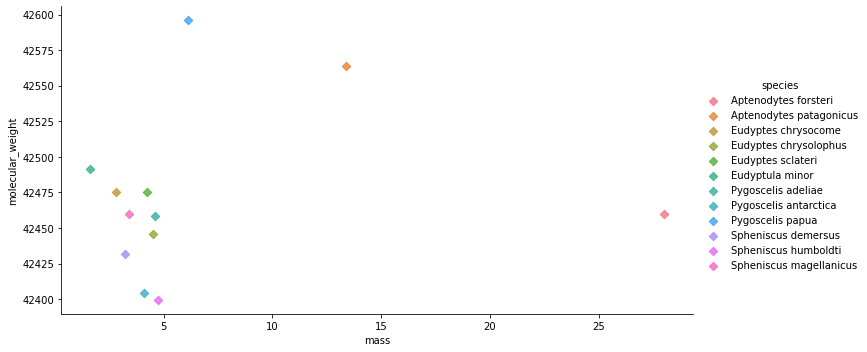

In [19]:
sns.lmplot(x="mass", y="molecular_weight", data=penguins_df, fit_reg=False, height=5, aspect=2, hue='species',markers='D') #to make a scatter plot of the molecular weight as a function of mass of the penguin species